# <span style="font-family:cursive; font-size:30px"><center>A Rising Tide - Data Science and Machine Learning in Nigeria</center></span>

<center><span style="font-family:cursive; font-size:30px"> by Sooter Saalu</span></center>

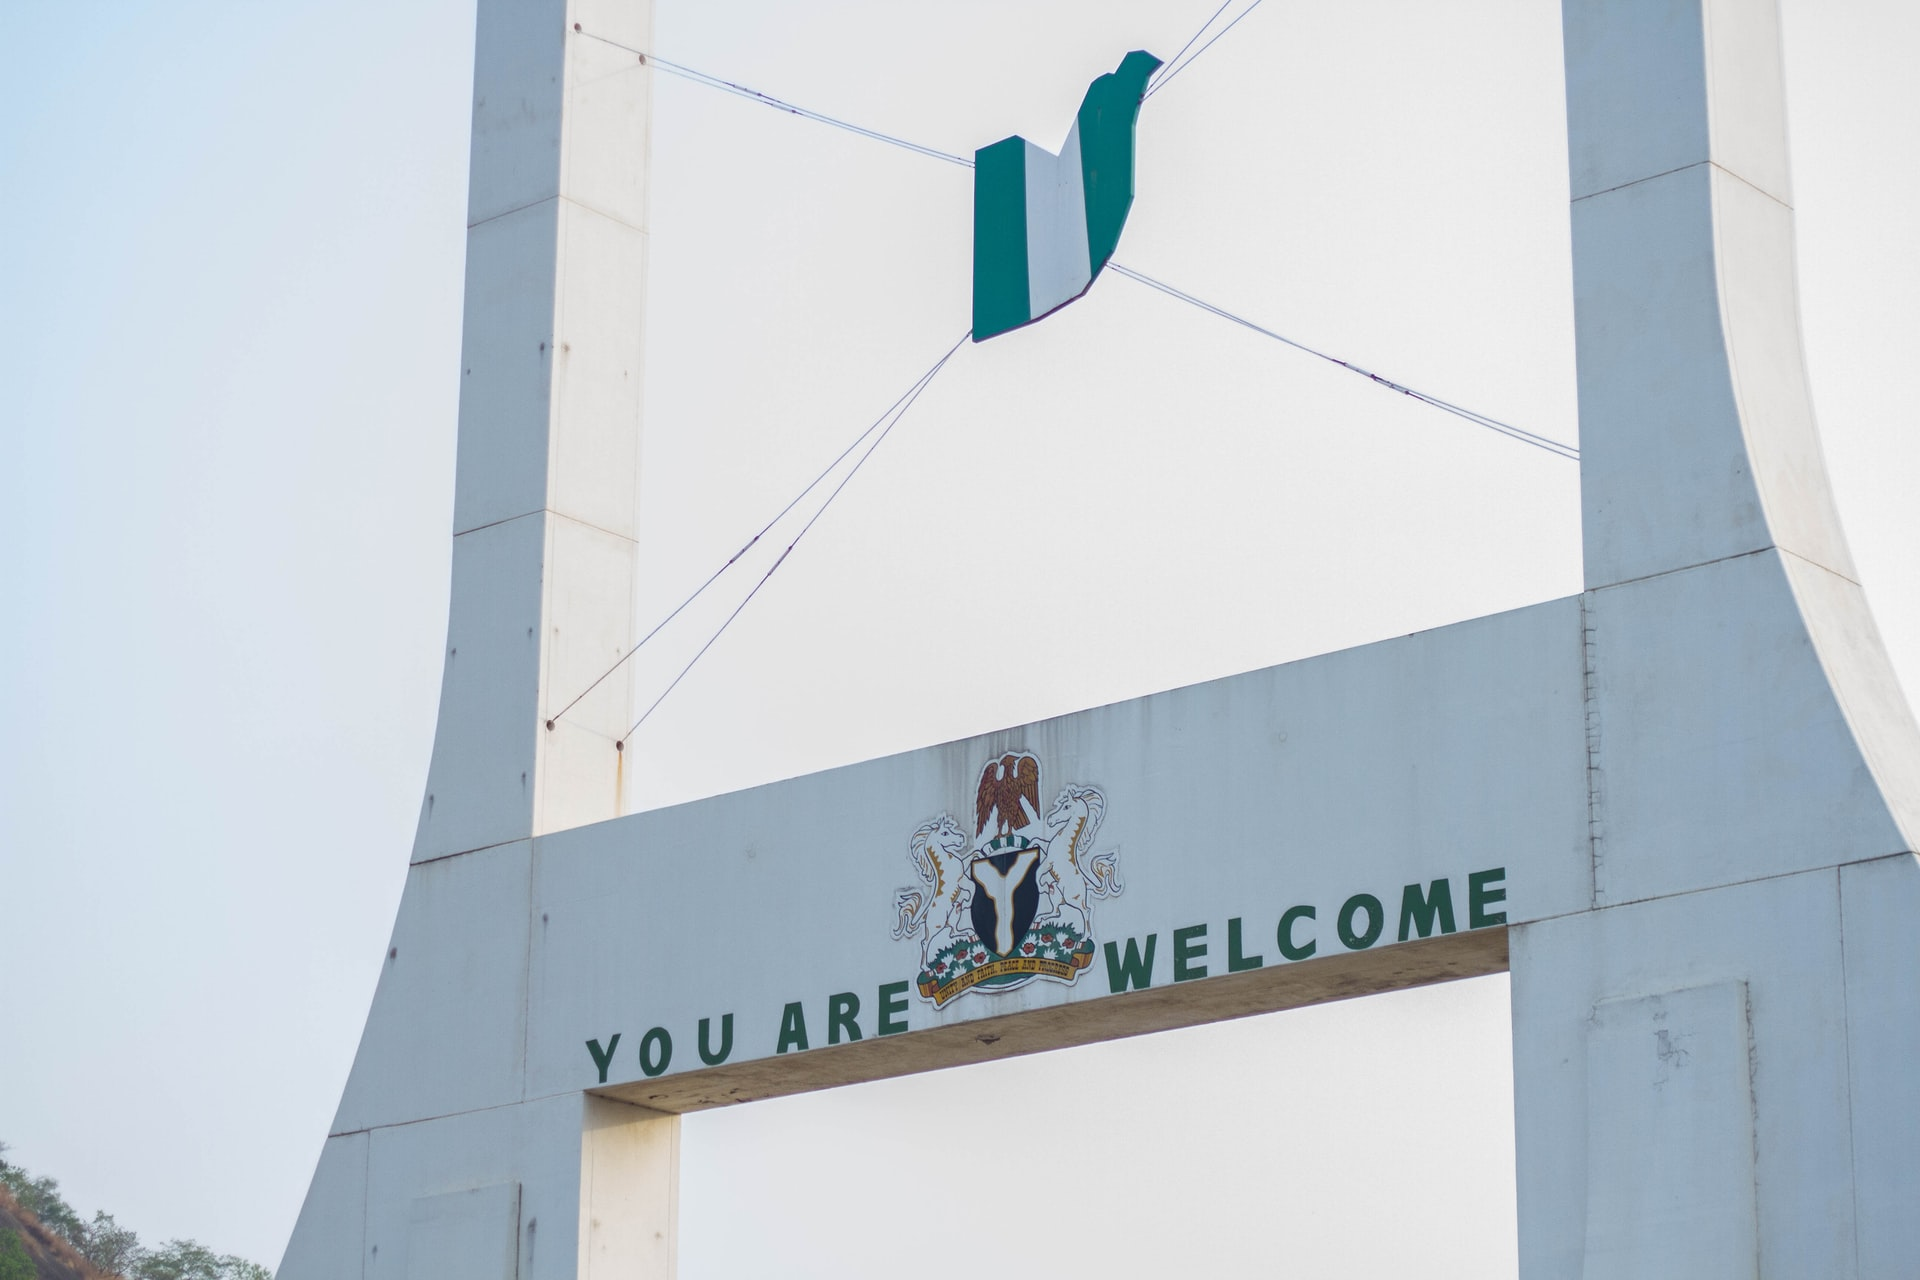

<center><span style="text-align:center">Photo by <a href="https://unsplash.com/@davidrotimi?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">David Rotimi</a> on <a href="https://unsplash.com/s/photos/nigeria-flag?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span></center>

<div id='top'>

   While software development is still the programming job of choice in the country, Data Science's popularity in Nigeria has continually increased over the years as numerous Nigerians find themselves captivated by its potential and gainfully engaged in the space.

However, there is still much to be done as there is a marked under-utilization of modern tools and new improvements in data science research, either due to a lack of knowledge or a fear of risk, Data Science's impact on the Nigerian market is not as widespread as it should be or how it would be once the inherent power in the continuously generated data is harnessed. 

Nevertheless, there is a lot to look forward to as the number of individuals and businesses interested in the science increase --[5 years Google Trend for Data Science](https://trends.google.com/trends/explore?date=today%205-y&geo=NG&q=%2Fm%2F0jt3_q3),-- the number of initiatives catered to train Nigerians increase as well. With companies like [Data Science Nigeria](https://www.datasciencenigeria.org/), [Hamoye](https://hamoye.com/), and [Utiva](https://utiva.io/) dedicating time and resources to educate young and old Nigerians on Advanced Analytics, Data Science, and Artificial Intelligence tools and methods, predicting a rising tide is a safe bet.

In this report, we will take a look at Kaggle's annual Data Science and Machine Learning Survey, exploring first the information on Nigerians; their programming tools, 'stack', where they learn, consume content, and their companies' utilization of Data Science while comparing with the information from the rest of the world.

***************************

***Insights***
- [The young, young and younger](#Ageinsight): 
Our participants are mostly below 40, with a Nigerian sample that is even younger.
- [Here be Students!](#Students) : 
We have a high proportion of Students; Bachelors & Masters mostly, Nigerian sample had mostly Bachelors.
- [Educated, Educated!](#Education) :
Overall with an over 50% proportion of Bachelor degrees, Nigeria edges out the rest of the world in terms of traditional university education (Bachelor's, Master's, Doctorate). 
- [As experience goes up, proportion goes down](#KaggleProblem) : Our survey had more beginners in coding and machine learning with a linear descent visualized.
- [You go to university for that?!](#University) A substantially lesser proportion of Nigerians learn data science from Universities when compared to the rest of the world.
- [Data Science Journals are boring, Where's the Twitter thread?](#Journals) : When consuming data science content, Journals, Reddit and Podcasts were the least favored in our Nigerian sample
- [Who is the greatest Dashboarder of them all?](#Streamlit) : For deployment/sharing tools, more Nigerians preferred Streamlit to Shiny or Plotly Dash, this preference was reversed in the rest of the world 
- [Underutilization of machine learning methods](#where) : A larger percentage of Nigerian businesses don't use machine learning at all, very few have a model in production.

************************

In [ ]:
# Importing python packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')
# saving default settings
IPython_default = plt.rcParams.copy()

In [ ]:
# setting templates for plots
from matplotlib import cycler
# setting default colors for plots
colors = cycler('color',
                ['#b33c7e','#EE6666', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
#setting background colors
plt.rc('axes', facecolor='none', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
# setting grid, tick, patch and plot line style
plt.rc('grid', color='gray', linestyle='-')
plt.rc('xtick', direction='out', color='#292929')
plt.rc('ytick', direction='out', color='#292929')
plt.rc('patch', edgecolor='#292929')
plt.rc('lines', linewidth=2)
# removes top and left lines from the plot 'box'
plt.rc("axes.spines", top=False, right=False)
plt.rcParams['figure.dpi'] = 200 # clearer view than default (more pixels per inch)
plt.rcParams['figure.figsize'] = [18, 10] #size template
plt.rcParams['font.family'] = 'serif' #font for all plots
pd.set_option("display.max_columns", 500) #increasing number of columns for easy view

In [ ]:
# reading in the Kaggle survey data from 2017 - 2020
df = pd.read_csv("/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv", low_memory=False)
df_2017 = pd.read_csv("/kaggle/input/kaggle-survey-2017/multipleChoiceResponses.csv", encoding='latin-1')
df_2018 = pd.read_csv("/kaggle/input/kaggle-survey-2018/multipleChoiceResponses.csv", low_memory=False)
df_2019 = pd.read_csv("/kaggle/input/kaggle-survey-2019/multiple_choice_responses.csv", low_memory=False)

# Data Cleaning, Trimming some variable names
df.loc[(df['Q2'] == 'Prefer not to say') | (df['Q2'] =='Nonbinary') | (df['Q2'] == 'Prefer to self-describe'),'Q2'] = 'Others'
df.loc[(df['Q4']=='Some college/university study without earning a bachelor’s degree'), 'Q4'] = 'Diploma/Associate degree'

# filtering and segmenting data according to the country and year
ng_2017 = df_2017[df_2017['Country'] == 'Nigeria']
ng_2018 = df_2018[df_2018['Q3'] == 'Nigeria']
ng_2019 = df_2019[df_2019['Q3'] == 'Nigeria']
ng_now = df[df['Q3'] == 'Nigeria']
others_2017 = df_2017[df_2017['Country'] != 'Nigeria']
others_2018 = df_2018[df_2018['Q3'] != 'Nigeria']
others_2019 = df_2019[df_2019['Q3'] != 'Nigeria']
others_now = df[df['Q3']!='Nigeria']

# converging population counts into a dataframe for analysis
nigeria_count = [len(ng_2017),len(ng_2018),len(ng_2019),len(ng_now)]
others_count = [len(others_2017),len(others_2018),len(others_2019),len(others_now)]
df_dict = {"Nigeria":nigeria_count, "Rest of the World": others_count, "Year": ['2017','2018','2019','2020']}
count_df = pd.DataFrame(df_dict) #final dataframe for number of participants 2017-2020

To start with, we look at the number of participants for the survey from 2017 till now

In [ ]:
# plotting line chart for population count data
fig, (ax1, ax2) = plt.subplots(1,2)

count_df.plot(x='Year', y='Nigeria', ax=ax1, color='mediumseagreen') # Our Nigerian sample will be plotted with green
count_df.plot(x='Year', y='Rest of the World', ax=ax2)
fig.suptitle('Comparing Number of Survey Respondents over the years')

plt.show()

Nigerians have increasingly shown up for Kaggle surveys, in terms of proportion ranking, they held the 39th position in 2017 while in 2020, they hold the 8th place with numbers (476) that would have earned them the 6th position in 2017. 

Compared to the rest of the world as a whole, there has been no dip in the growth of Nigerian respondents, as the number of Nigerians peaked instead in recent times with more than 6 times the number of Nigerian participants in 2017. 

********************************************************

[Back to the top](#top)

## Demographics of the Particpants


To better understand the diverse individuals who participated in the survey, we need to investigate their similarities and how they can be described as a whole.

***Age group***
<div id='Ageinsight'>

Here, we plotted distribution charts to explore the age groups in the Kaggle survey with both Nigeria and the Rest of the world, for easy comparison and analysis between the samples

In [ ]:
# most of my plotting codes are similar but I like to tweak some values based on the data so no functions :)

# plotting 2 barplots for age group comparision
others_now = others_now[others_now['Q1'] != "What is your age (# years)?"] # filtering out bad data
# most of my plotting codes are similar but I like to tweak some values based on the data so no functions :)
fig,(ax1,ax2) = plt.subplots(2)

ax1 = ng_now['Q1'].value_counts().sort_index().plot(kind='bar', ax = ax1, color='mediumseagreen') # mediumseagreen is the color for nigerian plots
ax2 = others_now['Q1'].value_counts().sort_index().plot(kind='bar', ax = ax2)
# setting titles for each plot
ax1.set_title('Age Distribution (Nigeria)')
ax2.set_title('Age Distribution (Rest of the World)')
plt.subplots_adjust(hspace=0.35) # add space between plots to avoid squeezed labels 

# annotating the percentages of the various categories on both axes
total = ng_now['Q1'].notnull().sum() # first we get the total number of respondents for this question
total1 = others_now['Q1'].notnull().sum()
# then we loop throught the plot info from the patches function (height & width) 
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total) # for vertical plots, we divide the height to get the value of the tips of the bar
    # positioning the annotation
    x = p.get_x() + p.get_width() 
    y = p.get_height()
    ax1.annotate(percentage, (x, y),va = 'bottom', ha='right',fontweight='light',color='#4a4a4a', bbox=dict(boxstyle='square,pad=0', fc='w', ec='none'))
# repeat for the second plot
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total1)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),va = 'bottom', ha='right',fontweight='light',color='#4a4a4a',bbox=dict(boxstyle='square,pad=0', fc='w', ec='none'))
fig.show()

Kaggle as a whole, <em>if this survey can be taken to be representative</em>, has a population that is heavily skewed towards younger people with 80% or more respondents positing to be below 40. 

This is especially true in the Nigerian sample, as most of their numbers fall below 35 years of age, with more people between 22 to 24 years than any other age group, this is different from the Rest of the World which has its highest proportion of people in the 25 to 29 years age group.

Taking a step back, Nigeria, all being said, is well known for its young population with over 90% of its 200 million+ population below 55 years --[CIA factbook](https://www.cia.gov/the-world-factbook/countries/nigeria/)-- 

***Gender***

The empowerment of discriminated genders and the elimination of gender gaps is a societal need that all well-meaning individuals should seek to alleviate. Here, we look at the gender distribution in the survey.

📍 ***"Non-binary", "I prefer to self disclose" and "I would rather not say" are grouped into "Others" due to their low proportion*** 📍

In [ ]:
# plotting 2 barplots for gender distribution comparision
fig,(ax1,ax2) = plt.subplots(1,2) # side by side subplots instead
ax1 = ng_now['Q2'].value_counts(ascending=True).plot(kind='barh', ax = ax1, color='mediumseagreen')
ax2 = others_now['Q2'].value_counts(ascending=True).plot(kind='barh', ax = ax2) # bars ploted horizontally
ax1.set_title('Nigeria')
ax2.set_title('Rest of the World')
plt.subplots_adjust(wspace=0.35) # space between plots
fig.suptitle('Gender Distribution in the Survey')

# annotating axes with percentage information  
total = ng_now['Q2'].notnull().sum()
total1 = others_now['Q2'].notnull().sum()
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total) #calculating the percentage for each gender category 
                                                                #(width this time because it's horizontal)
    x = p.get_width()
    y = p.get_y() + p.get_height() - 0.3 # cenering the annotation in the middle of the bar
    #annotation with a light, white styling.
    ax1.annotate(percentage, (x, y),va = 'bottom', ha='left',fontweight='light',color='#4a4a4a',bbox=dict(boxstyle='square,pad=0', fc='w', ec='none'))
# repeat for second plot
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total1)
    x = p.get_width() 
    y = p.get_y() + p.get_height() - 0.3
    ax2.annotate(percentage, (x, y),va = 'bottom', ha='left',fontweight='light',color='#4a4a4a', bbox=dict(boxstyle='square,pad=0', fc='w', ec='none'))
fig.show()

As could be expected or predicted, there is a heavy imbalance in the proportion of each gender to Kaggle's survey, with men having clear dominance in this space. This dominance can be said to be representative of the 'STEM' world and the larger problem of societal gender gaps. 

With men in Nigeria having a larger percentage (82.4%) than their counterparts in the Rest of the World (78.7%), the problem is reiterated, largely justifying more underrepresented in tech programmes, women in tech, women in data science like this [Digital Explorers](https://digitalexplorers.eu/projects/female-track/) programme and similar ones targetting women and other underrepresented genders in Nigeria.

***Occupation***
<div id='Students'>
Apart from the age and gender variables, an occupational analysis is important in understanding the Nigerian Kaggle population and drilling into which segments are engaged on the platform. 

In [ ]:
# plotting subplots on Occupational data
fig,(ax1,ax2) = plt.subplots(2)
ax1 = ng_now['Q5'].value_counts(ascending=True).plot(kind='barh', ax = ax1, color='mediumseagreen')
ax2 = others_now['Q5'].value_counts(ascending=True).plot(kind='barh', ax = ax2)
ax1.set_title('Occupation (Nigeria)')
ax2.set_title('Occupation (Rest of the World)')
plt.subplots_adjust(wspace=0.35)
# annotating
total = ng_now['Q5'].notnull().sum()
total1 = others_now['Q5'].notnull().sum()
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_width()
    y = p.get_y() + p.get_height()
    ax1.annotate(percentage, (x, y),va = 'top', ha='left',fontweight='light',color='#4a4a4a',bbox=dict(boxstyle='square,pad=0', fc='w', ec='none'))
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total1)
    x = p.get_width()
    y = p.get_y() + p.get_height()
    ax2.annotate(percentage, (x, y),va = 'top', ha='left',fontweight='light',color='#4a4a4a', bbox=dict(boxstyle='square,pad=0', fc='w', ec='none'))
fig.show()

A significantly large population of 'Kagglers' as a whole, identify as Students, this is a sneak-peak at the largest use case for Kaggle, with a number of learning initiatives advising opening a Kaggle account and engaging with the content, however, it could also be representative of the amount of young new entrants there are into Data Science yearly, further analysis could be helpful.

For both samples; in Nigeria & the Rest of the World, the top six job roles are 'Student', 'Data Scientist', 'Data Analyst', 'Software Engineer', 'Currently not employed', and 'Other' (Unlisted Data or Non-Data positions) in different orders.

Kaggle can be described as a data science community with datasets, competitions, notebooks, and courses geared towards Data science, therefore, we can say that all occupations visualized here have an interest in or benefit from data science. With this in mind, the 5.7 percent Software Engineer proportion in Nigeria compared to an almost double 10.3 percentage for the Rest of the World can point to a lesser interest in data science by Nigerian software engineers or a sharper divide between data tasks that bears looking at later on.

There is a higher percentage of Nigerian Data Scientists which is balanced by a lower percentage in other listed data science roles, representative of a data science space that hasn't settled yet on the optimal distribution of labor and work roles, leaving individuals working on end to end data science projects solely. It is worthy to note that the second largest segment of Nigerians in this survey identify as currently unemployed, a worrying indication of the environment or industry.  

***Educational Level***
<div id='Education'>
To be successful in data science, there is a need for a myriad of domain knowledge, as well as an understanding of what tools are needed, why specifically they are needed, and their applications. Most job descriptions in the space include educational requirements, most times a graduate degree in Computer Science or a statistical field.

While there is a lot of encouragement for self-paced learners in the form of popular examples of individuals who have gone through the process, the Data Science space still requires a large educational base.

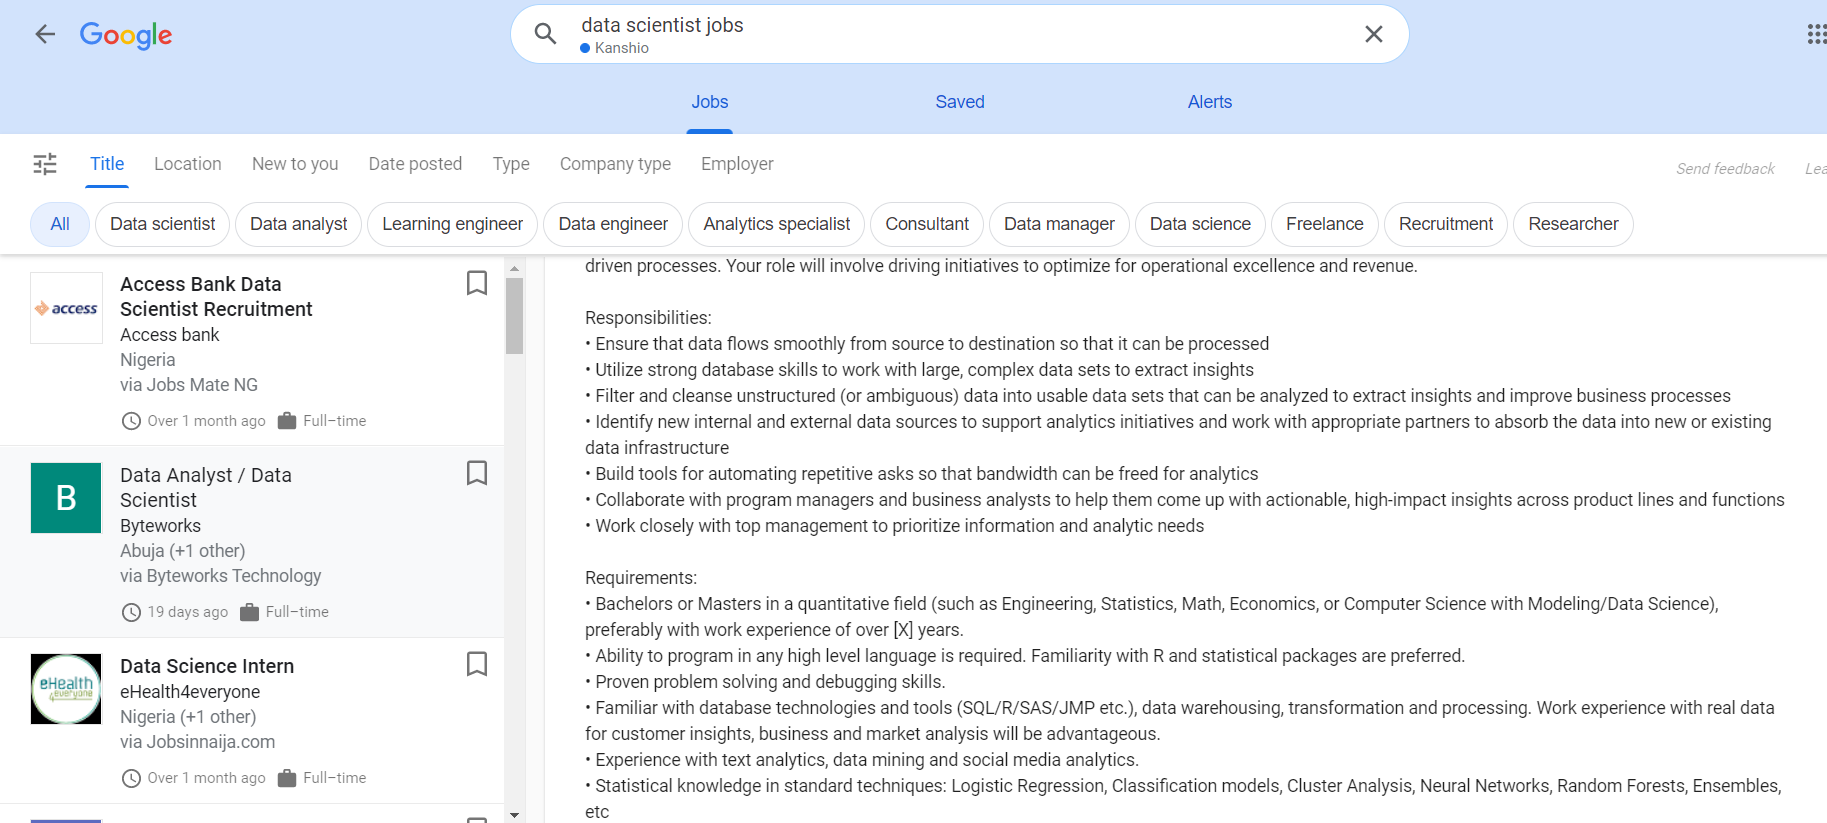 *Google search job listing for Nigerian Data Science Jobs* 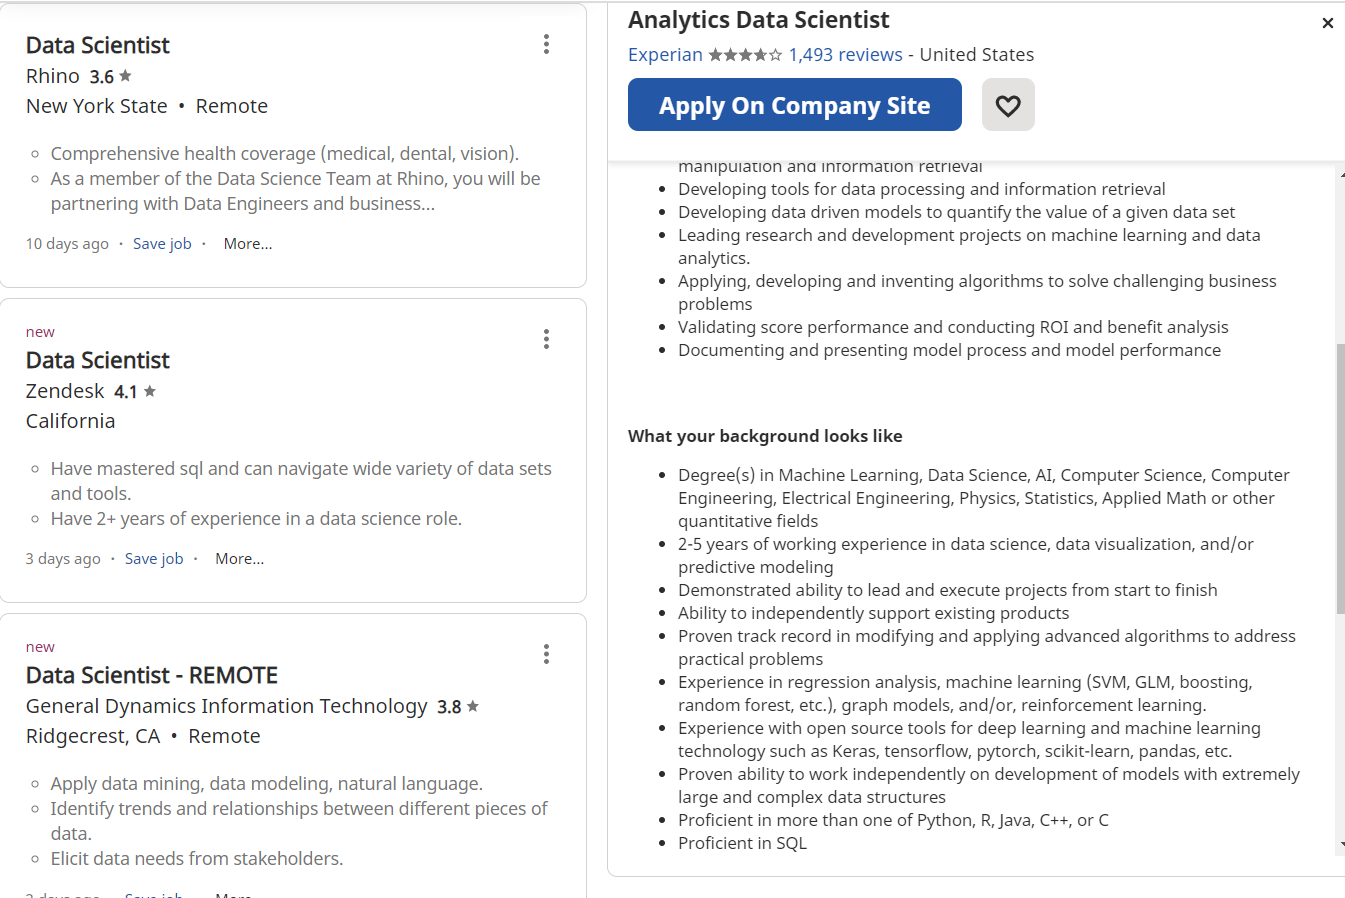 *Indeed job search for Data Science Jobs*

In [ ]:
# plotting two stacked horizontal barplots
fig,(ax1,ax2) = plt.subplots(2)
ax1 = ng_now['Q4'].value_counts(ascending=True).plot(kind='barh', ax = ax1, color='mediumseagreen')
ax2 = others_now['Q4'].value_counts(ascending=True).plot(kind='barh', ax = ax2)
ax1.set_title('Educational Level (Nigeria)')
ax2.set_title('Educational Level (Rest of the World)')
plt.subplots_adjust(wspace=0.35)
# annotating the bar plots
total = ng_now['Q4'].notnull().sum()
total1 = others_now['Q4'].notnull().sum()
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_width()
    y = p.get_y() + p.get_height()
    ax1.annotate(percentage, (x, y),va = 'top', ha='left',fontweight='light',color='#4a4a4a',bbox=dict(boxstyle='square,pad=0', fc='w', ec='none'))
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total1)
    x = p.get_width()
    y = p.get_y() + p.get_height()
    ax2.annotate(percentage, (x, y),va = 'top', ha='left',fontweight='light',color='#4a4a4a', bbox=dict(boxstyle='square,pad=0', fc='w', ec='none'))

fig.show()

The Nigerian respondents are seen to have a larger percentage of Bachelor degree holders followed by Master degrees, the case is reversed with the Rest of the World as Master level graduates are the largest segment as a whole. 

Overall with an over 50% proportion of Bachelor degrees, Nigeria edges out the rest of the world in terms of traditional university education (Bachelor's, Master's, Doctorate). However, this lead is lost when only postgraduate studies are considered.

There are also a lesser proportion of individuals with no formal education past high school, which might be indicative of the less than average chance of such an individual studying/working in Data Science or an indicator of more effective federal school initiative, even cultural pressure [Why are Nigerians the most educated (immigrant) group in America](https://www.quora.com/Why-are-Nigerians-the-most-educated-group-in-America)

Going back to our previous insight on 'Students' being a large segment of the Kaggle population. It would be beneficial to go further with connecting the job role categories with the varied educational levels, in order to drill into the Student segment, investigating which educational level they are students of, as well as other insights.

In [ ]:
# Builing a crosstab heatmap to check proportions of each category
intersect = pd.crosstab(ng_now['Q4'], ng_now['Q5'], normalize='columns', margins=True)
sg =sns.heatmap(intersect, cmap="Greens", annot=True, cbar=False, linewidths=0.5)
sg.set_title('Educational Level vs Occupation (Nigeria)')
sg.set_ylabel('Educational Level')
sg.set_xlabel('Occupation')

fig.show()

In [ ]:
# looking at the counts for the job roles 
ng_now['Q5'].value_counts()

From the heatmap plotted, we can see that the high proportion of Bachelor's degree holders in Nigeria allows for a large presence, 50% or more, in all listed job roles with a few exceptions. Looking at those exceptions, the DBA/Database Engineer role had only one Nigerian respondent but they had a Master's degree, the Data Engineer, Research Scientist, and Statistician roles all had more Masters degrees than Bachelors as well as the 'Others' category.

Investigating this plot showed that Nigerian Student Kagglers were mostly in school for Bachelor programmes, let's see if it is the same for the Rest of the World.

In [ ]:
# checking proportions in the larger population
intersect = pd.crosstab(others_now['Q4'], others_now['Q5'], normalize='columns', margins=True)
sg =sns.heatmap(intersect, cmap="Purples", annot=True, cbar=False, linewidths=0.5)
sg.set_title('Educational Level vs Occupation (Rest of the World)')
sg.set_ylabel('Educational Level')
sg.set_xlabel('Occupation')
fig.show()

With the higher range of Masters degrees in the Rest of the World as seen earlier, they are dominant in all job positions except Unemployed, Software Engineer, and Student, which had more Bachelor degrees and the Research Scientist role, which had mostly (59%) Doctoral degrees.


Comparing both plots and their population, a significant percentage of the Research scientists have postgraduate degrees highlighting a higher educational or technical base for the role.

With a better picture of our mostly males below thirty, having a large percentage of Bachelor degree Students, Nigerian sample, we can go forward with understanding their interests in Data Science, what tools they have used, where they learn and consume data science content. 
<div id='KaggleProblem'>
To start off, we explore their experience in coding or programming and machine learning.

In [ ]:
# plotting two side-by-side barplots
fig,(ax1,ax2) = plt.subplots(1,2)

ax1 = ng_now['Q6'].value_counts(ascending=True).plot(kind='barh', ax = ax1, color='mediumseagreen')
ax2 = others_now['Q6'].value_counts(ascending=True).plot(kind='barh', ax = ax2)

ax1.set_title('Nigeria')
ax2.set_title('Rest of the World')

plt.subplots_adjust(wspace=0.35)
fig.suptitle('Years coding or programming')
# annotating the tops of the bars with percentage of total values
total = ng_now['Q6'].notnull().sum()
total1 = others_now['Q6'].notnull().sum()
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_width()
    y = p.get_y() + p.get_height()
    ax1.annotate(percentage, (x, y),va = 'top', ha='left',fontweight='light',color='#4a4a4a',bbox=dict(boxstyle='square,pad=0', fc='w', ec='none'))
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total1)
    x = p.get_width()
    y = p.get_y() + p.get_height()
    ax2.annotate(percentage, (x, y),va = 'top', ha='left',fontweight='light',color='#4a4a4a', bbox=dict(boxstyle='square,pad=0', fc='w', ec='none'))

fig.show()

As both samples have relatively younger individuals, as seen previously, it is not surprising that most of the Kagglers here have 5 or fewer years of experience in coding. 

The Nigerian sample shows an almost linear progression descending from relative novices who started programming within the year to individuals with up to 10 or more years of experience, comparing the two plots, we see there are no Nigerian individuals with 20+ years of experience in the sample. 

In [ ]:
# plotting subplots
fig,(ax1,ax2) = plt.subplots(2)
ax1 = ng_now['Q15'].value_counts(ascending=True).plot(kind='barh', ax = ax1, color='mediumseagreen')
ax2 = others_now['Q15'].value_counts(ascending=True).plot(kind='barh', ax = ax2)
ax1.set_title('Machine Learning experience (Nigeria)')
ax2.set_title('Machine Learning experience (Rest of the World)')
plt.subplots_adjust(wspace=0.35)
# annotating percentages
total = ng_now['Q15'].notnull().sum()
total1 = others_now['Q15'].notnull().sum()
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_width()
    y = p.get_y() + p.get_height()
    ax1.annotate(percentage, (x, y),va = 'top', ha='left',fontweight='light',color='#4a4a4a',bbox=dict(boxstyle='square,pad=0', fc='w', ec='none'))
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total1)
    x = p.get_width()
    y = p.get_y() + p.get_height()
    ax2.annotate(percentage, (x, y),va = 'top', ha='left',fontweight='light',color='#4a4a4a', bbox=dict(boxstyle='square,pad=0', fc='w', ec='none'))
fig.show()

Machine learning is a significant part of data science with a wide range of real-world applications. For our survey sample, a larger percentage of participants only had less than a year's experience in the topic. 

While there are differences in percentage proportion, there were few differences in ranking as there was again, an almost linear progression starting with a large percentage of beginners that reduces as experience increases. Again, the Nigerian sample had no individual with 20+ experience 

********************************************************

[Back to the top](#top)

## Data Science Tools


There has been a lot of improvement in the data science, data analytics space, as demand for data-fueled decisions and innovations grew. This has driven the popularity and importance of many tools that help enrich the process. However, there is a lot of individual preference with companies also having standards for which tools to use.

Here, we look at some of those preferences.

In [ ]:
# compressing multichoice columns into one and getting a count to plot
fig, (ax1, ax2) = plt.subplots(2,1)
df_q7 = ng_now[[i for i in ng_now.columns if 'Q7' in i]] # Extracting the columns
df_q7_count = pd.Series(dtype='int') # opening a pandas series for the count
# loop through each column count the values append the count and name to the series
for i in df_q7.columns:
    df_q7_count[df_q7[i].value_counts().index[0]] = df_q7[i].count()

# repeat for the "Rest of the World"
df_q71 = others_now[[i for i in others_now.columns if 'Q7' in i]] # Extracting the columns
df_q7_count1 = pd.Series(dtype='int') # opening a pandas series for the count
# loop through each column count the values append the count and name to the series
for i in df_q71.columns:
    df_q7_count1[df_q71[i].value_counts().index[0]] = df_q71[i].count()

ax1 = df_q7_count.sort_values(ascending =False).plot(kind='bar', color='mediumseagreen', ax=ax1)
ax2 = df_q7_count1.sort_values(ascending =False).plot(kind='bar', ax=ax2)

plt.subplots_adjust(hspace=0.35) # space between subplots
fig.suptitle('Common Programming Languages used')

# annotating the tops of the bars with percentage of total values
total = df_q7_count.sum()
total1 = df_q7_count1.sum()
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),va = 'bottom', ha='right',fontweight='light',color='#4a4a4a',bbox=dict(boxstyle='square,pad=0', fc='w', ec='none'))

for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total1)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),va = 'bottom', ha='right',fontweight='light',color='#4a4a4a',bbox=dict(boxstyle='square,pad=0', fc='w', ec='none'))

fig.show()

Python's popularity is still ongoing with SQL coming a far second, both programming languages are data staples used by most data-related roles. The javascript ranking might point to some web experience in our participants especially the Software Engineers. Our Rest of the World sample has a lesser proportion of Javascript users with the top three being Python, SQL, and R

In [ ]:
# compressing multichoice columns into one and getting a count to plot
fig, (ax1, ax2) = plt.subplots(2,1)
df_q16 = ng_now[[i for i in ng_now.columns if 'Q16' in i]] # Extracting the columns
df_q16_count = pd.Series(dtype='int') # opening a pandas series for the count
# loop through each column count the values append it the count and name to the series
for i in df_q16.columns:
    df_q16_count[df_q16[i].value_counts().index[0]] = df_q16[i].count()

# repeat for the "Rest of the World"
df_q161 = others_now[[i for i in others_now.columns if 'Q16' in i]] # Extracting the columns
df_q16_count1 = pd.Series(dtype='int') # opening a pandas series for the count
# loop through each column count the values append it the count and name to the series
for i in df_q161.columns:
    df_q16_count1[df_q161[i].value_counts().index[0]] = df_q161[i].count()

ax1 = df_q16_count.sort_values(ascending =False).plot(kind='bar', color='mediumseagreen', ax=ax1)
ax2 = df_q16_count1.sort_values(ascending =False).plot(kind='bar', ax=ax2)

plt.subplots_adjust(hspace=0.45) # space between subplots
fig.suptitle('Common Machine Learning Frameworks used')
# annotating the tops of the bars with percentage of total values

total = df_q16_count.sum()
total1 = df_q16_count1.sum()
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),va = 'bottom', ha='right',fontweight='light',color='#4a4a4a',bbox=dict(boxstyle='square,pad=0', fc='w', ec='none'))

for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total1)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),va = 'bottom', ha='right',fontweight='light',color='#4a4a4a',bbox=dict(boxstyle='square,pad=0', fc='w', ec='none'))

fig.show()

Scikit-learn is our most popular framework in both samples. The machine learning library has been a staple in data science since its initial release in 2007 with its beginner-friendly methodologies and its wide range of functions for different use cases. Google's Tensor Flow comes second for both samples. Comparing both plots, our first deviation is the ranking of Keras, which is often used as a companion to Tensor Flow for deep learning. Facebook's PyTorch doesn't rank top 5 in the Nigerian sample.

In [ ]:
# plotting subplots
fig, (ax1,ax2) = plt.subplots(2)
data_q38 = ng_now[[i for i in ng_now.columns if 'Q38' in i]]
data_q38_count=data_q38.stack().reset_index()[0].value_counts().sort_index() #getting info across multichoice columns accounting for NaN values
data_q38_count.sort_values().plot(kind='barh', ax=ax1, color='mediumseagreen')

# repeat for second plot
data_q38_ = others_now[[i for i in others_now.columns if 'Q38' in i]]
data_q38_count_ = data_q38_.stack().reset_index()[0].value_counts().sort_index()

data_q38_count_.sort_values().plot(kind='barh', ax= ax2)
fig.suptitle('Popular Tool used for Analyzing')

# annotating percentage values
total = data_q38_count.sum()
total1 = data_q38_count_.sum()
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_width()
    y = p.get_y() + p.get_height()
    ax1.annotate(percentage, (x, y),va = 'top', ha='left',fontweight='light',color='#4a4a4a',bbox=dict(boxstyle='square,pad=0', fc='w', ec='none'))
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total1)
    x = p.get_width()
    y = p.get_y() + p.get_height()
    ax2.annotate(percentage, (x, y),va = 'top', ha='left',fontweight='light',color='#4a4a4a', bbox=dict(boxstyle='square,pad=0', fc='w', ec='none'))


fig.show()

Although, there are software packages that boast predictive modeling capabilities, for data science roles, programming in most languages offers more flexibility in the modeling process. With this in mind, it is not surprising to see that programming development applications were the most popular tool for analysis in both samples. Basic statistical packages like Excel, are often an individual's first impression of "data", the tools are still the first contact for structured data in many companies, there have been numerous improvements of the tool as the data space grew, allowing it to keep its competitive edge.

Cloud-based software still has some improvements to make to be palatable to the general public, especially in Nigeria. Although, as the main draw is the easier management of big data, they fulfill a need that has just not been generally realized.

********************************************************

[Back to the top](#top)

## Data Science Learning & Content Consumption

<div id='University'>
    
 Here, we investigate how our participants learn and get updates on the data science space.

In [ ]:
# compressing multichoice columns into one and getting a count to plot
fig, (ax1, ax2) = plt.subplots(2,1)
df_q37 = ng_now[[i for i in ng_now.columns if 'Q37' in i]] # Extracting the columns
df_q37_count = pd.Series(dtype='int') # opening a pandas series for the count
# loop through each column count the values append it the count and name to the series
for i in df_q37.columns:
    df_q37_count[df_q37[i].value_counts().index[0]] = df_q37[i].count()

# repeat for the "Rest of the World"
df_q371 = others_now[[i for i in others_now.columns if 'Q37' in i]] # Extracting the columns
df_q37_count1 = pd.Series(dtype='int') # opening a pandas series for the count
# loop through each column count the values append it the count and name to the series
for i in df_q371.columns:
    df_q37_count1[df_q371[i].value_counts().index[0]] = df_q371[i].count()

ax1 = df_q37_count.sort_values(ascending = True).plot(kind='barh', color='mediumseagreen', ax=ax1)
ax2 = df_q37_count1.sort_values(ascending = True).plot(kind='barh', ax=ax2)

plt.subplots_adjust(hspace=0.35) # space between subplots
fig.suptitle('Common Learning Platforms used')
# annotating the tops of the bars with percentage of total values

total = df_q37_count.sum()
total1 = df_q37_count1.sum()
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_width()
    y = p.get_y() + p.get_height()
    ax1.annotate(percentage, (x, y),va = 'top', ha='left',fontweight='light',color='#4a4a4a',bbox=dict(boxstyle='square,pad=0', fc='w', ec='none'))

for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total1)
    x = p.get_width()
    y = p.get_y() + p.get_height()
    ax2.annotate(percentage, (x, y),va = 'top', ha='left',fontweight='light',color='#4a4a4a',bbox=dict(boxstyle='square,pad=0', fc='w', ec='none'))

fig.show()

When looking at the learning platforms where data science learning took place, we see that Coursera had a larger percentage than all comers in both samples, perhaps a nod to their large library of courses on diverse topics and the ability to "audit" most courses for free. Udemy and Kaggle learn courses came next with different orders in the two samples.

Comparing both plots, the presence of University courses in the top 5 for the Rest of the World sample might point to the availability of graduate studies targetted at data science whereas a Nigerian degree could only be adjacent with Statistics, Mathematics or Computer Science courses.

<div id='Journals'>

In [ ]:
# compressing multichoice columns into one and getting a count to plot
fig, (ax1, ax2) = plt.subplots(2,1)
df_q39 = ng_now[[i for i in ng_now.columns if 'Q39' in i]] # Extracting the columns
df_q39_count = pd.Series(dtype='int') # opening a pandas series for the count
# loop through each column count the values append it the count and name to the series
for i in df_q39.columns:
    df_q39_count[df_q39[i].value_counts().index[0]] = df_q39[i].count()

# repeat for the "Rest of the World"
df_q391 = others_now[[i for i in others_now.columns if 'Q39' in i]] # Extracting the columns
df_q39_count1 = pd.Series(dtype='int') # opening a pandas series for the count
# loop through each column count the values append it the count and name to the series
for i in df_q391.columns:
    df_q39_count1[df_q391[i].value_counts().index[0]] = df_q391[i].count()

ax1 = df_q39_count.sort_values(ascending = True).plot(kind='barh', color='mediumseagreen', ax=ax1)
ax2 = df_q39_count1.sort_values(ascending = True).plot(kind='barh', ax=ax2)

plt.subplots_adjust(hspace=0.3) # space between subplots
fig.suptitle('Common Media Sources used')
# annotating the tops of the bars with percentage of total values

total = df_q39_count.sum()
total1 = df_q39_count1.sum()
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_width()
    y = p.get_y() + p.get_height()
    ax1.annotate(percentage, (x, y),va = 'top', ha='left',fontweight='light',color='#4a4a4a',bbox=dict(boxstyle='square,pad=0', fc='w', ec='none'))

for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total1)
    x = p.get_width()
    y = p.get_y() + p.get_height()
    ax2.annotate(percentage, (x, y),va = 'top', ha='left',fontweight='light',color='#4a4a4a',bbox=dict(boxstyle='square,pad=0', fc='w', ec='none'))

fig.show()

Our top 4 ranking is the same in both samples with similar percentages highlighting the prominence of these platforms in data science related content; Kaggle, Youtube, Blogs, and Twitter.

The Nigerian participants found journal publications on data science less useful than their peers, preferring Newsletters, Slack communities, and Course forums over it. 

<div id='Streamlit'>

In [ ]:
# plotting subplots
fig, (ax1,ax2) = plt.subplots(2)
data_q36 = ng_now[[i for i in ng_now.columns if 'Q36' in i]]
data_q36_count=data_q36.stack().reset_index()[0].value_counts().sort_index() # collatting multicolumn info
data_q36_count.sort_values().plot(kind='barh', ax=ax1, color='mediumseagreen')

data_q36_ = others_now[[i for i in others_now.columns if 'Q36' in i]]
data_q36_count_ = pd.Series(dtype='int')
for i in data_q36_.columns:
    data_q36_count_[data_q36_[i].value_counts().index[0]] = data_q36_[i].count()

data_q36_count_.sort_values().plot(kind='barh', ax= ax2)

fig.suptitle('Common Platforms to Deploy or Share ML projects')
# annoting percentage values
total = data_q36_count.sum()
total1 = data_q36_count_.sum()
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_width()
    y = p.get_y() + p.get_height()
    ax1.annotate(percentage, (x, y),va = 'top', ha='left',fontweight='light',color='#4a4a4a',bbox=dict(boxstyle='square,pad=0', fc='w', ec='none'))
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total1)
    x = p.get_width()
    y = p.get_y() + p.get_height()
    ax2.annotate(percentage, (x, y),va = 'top', ha='left',fontweight='light',color='#4a4a4a', bbox=dict(boxstyle='square,pad=0', fc='w', ec='none'))


fig.show()

The data science space can be a vocal one, with numerous "influencers" but it also has a lot of people sharing what they have done or learnt daily, here we look at the popular platforms to share work publicly to be viewed by others.

GitHub and Kaggle come out Top 3 in both samples, GitHub's prominence in the programming/developer scene is obvious to anyone in the space, as even without the excellent version control capabilities allowing for efficient teamwork, it is an excellent place to build a portfolio with personal or open-source projects. 

Kaggle is also a great place to showcase data science talents as public competitions or just unique datasets drive a large population looking to learn, compete, or build their data science muscles. There were a substantial amount of people especially in the "Rest of the World" sample that don't share that work publicly either due to work restrictions, personal preference, or other concerns.

It is worthy to note that more Nigerian participants chose Streamlit over Shiny and Plotly Dash for their web application, dashboarding needs, a decision that is reversed in the Rest of the World sample. Also, no Nigerian participant has used NBViewer, which is a tool for rendering Jupyter notebooks (from GitHub or elsewhere) as a webpage for easier sharing or embedding, a use case which is a bit niche with other alternatives as seen from its low percentage in the Rest of the World. 

********************************************************

[Back to the top](#top)

## Company


Here, we look at the structure of companies our participants worked in (this section is filtered for those with company jobs) and how they are using machine learning and data science as a whole.

In [ ]:
# plotting subplots on company data
fig,(ax1,ax2) = plt.subplots(2)
ax1 = ng_now['Q20'].value_counts(ascending=True).plot(kind='barh', ax = ax1, color='mediumseagreen')
ax2 = others_now['Q20'].value_counts(ascending=True).plot(kind='barh', ax = ax2)
ax1.set_title('Company size (Nigeria)')
ax2.set_title('Company size (Rest of the World)')
plt.subplots_adjust(wspace=0.35)
# annotating
total = ng_now['Q20'].notnull().sum()
total1 = others_now['Q20'].notnull().sum()
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_width()
    y = p.get_y() + p.get_height()
    ax1.annotate(percentage, (x, y),va = 'top', ha='left',fontweight='light',color='#4a4a4a',bbox=dict(boxstyle='square,pad=0', fc='w', ec='none'))
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total1)
    x = p.get_width()
    y = p.get_y() + p.get_height()
    ax2.annotate(percentage, (x, y),va = 'top', ha='left',fontweight='light',color='#4a4a4a', bbox=dict(boxstyle='square,pad=0', fc='w', ec='none'))
fig.show()

Most of our participants, especially in the Nigerian segment, work in companies with less than 50 employees. 

Comparing plots, we see the second largest proportion in the Rest of the World sample is the highest option of 10,000 or more employees. This either posits that such a company is more common than expected or the demographics of this sample are largely represented influencing the proportion.

In [ ]:
# plotting subplots
fig,(ax1,ax2) = plt.subplots(2)
ax1 = ng_now['Q21'].value_counts(ascending=True).plot(kind='barh', ax = ax1, color='mediumseagreen')
ax2 = others_now['Q21'].value_counts(ascending=True).plot(kind='barh', ax = ax2)
ax1.set_title('Size of Data Science Team (Nigeria)')
ax2.set_title('Size of Data Science Team (Rest of the World)')
plt.subplots_adjust(wspace=0.35)
# annotating
total = ng_now['Q21'].notnull().sum()
total1 = others_now['Q21'].notnull().sum()
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_width()
    y = p.get_y() + p.get_height()
    ax1.annotate(percentage, (x, y),va = 'top', ha='left',fontweight='light',color='#4a4a4a',bbox=dict(boxstyle='square,pad=0', fc='w', ec='none'))
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total1)
    x = p.get_width()
    y = p.get_y() + p.get_height()
    ax2.annotate(percentage, (x, y),va = 'top', ha='left',fontweight='light',color='#4a4a4a', bbox=dict(boxstyle='square,pad=0', fc='w', ec='none'))
fig.show()

The top two entries for the size of the companies' data science team gives us a view into how far companies take their utilization of Data Science.  A high percentage of the companies represented here have less than 3 people on their data science team and the next percentage ranking goes to companies with no dedicated data science team at all. 

This means the company does not use machine learning or data science at all or any data science tasks are covered or taken by company members who are not solely dedicated to its execution.

We see more on that in the next plot.

<div id='where'>

In [ ]:
# plotting subplots 
fig,(ax1,ax2) = plt.subplots(2)
ax1 = ng_now['Q22'].value_counts(ascending=True).plot(kind='barh', ax = ax1, color='mediumseagreen')
ax2 = others_now['Q22'].value_counts(ascending=True).plot(kind='barh', ax = ax2)
ax1.set_title('Nigeria')
ax2.set_title('Rest of the World')
fig.suptitle('Use of Machine Learning in Business')
plt.subplots_adjust(wspace=0.35)
# annotating
total = ng_now['Q22'].notnull().sum()
total1 = others_now['Q22'].notnull().sum()
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_width()
    y = p.get_y() + p.get_height()
    ax1.annotate(percentage, (x, y),va = 'top', ha='left',fontweight='light',color='#4a4a4a',bbox=dict(boxstyle='square,pad=0', fc='w', ec='none'))
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total1)
    x = p.get_width()
    y = p.get_y() + p.get_height()
    ax2.annotate(percentage, (x, y),va = 'top', ha='left',fontweight='light',color='#4a4a4a', bbox=dict(boxstyle='square,pad=0', fc='w', ec='none'))
fig.show()

More Nigerian businesses don't use machine learning methods when looking at proportion. Comparing plots, the two samples have "exploring machine learning methods" or "not using them at all" as their top entries to the question "Does your employer incorporate machine learning methods into their business?".

Very few companies have a model in production already in the Nigerian space highlighting the under-utilization of machine learning methods.

In [ ]:
# plotting subplots
fig,(ax1,ax2) = plt.subplots(2)
ax1 = ng_now['Q25'].value_counts(ascending=True).plot(kind='barh', ax = ax1, color='mediumseagreen')
ax2 = others_now['Q25'].value_counts(ascending=True).plot(kind='barh', ax = ax2)
ax1.set_title('Amount spent on Data Science services (Nigeria)')
ax2.set_title('Amount spent on Data Science services (Rest of the World)')
plt.subplots_adjust(wspace=0.35)
# annotating
total = ng_now['Q25'].notnull().sum()
total1 = others_now['Q25'].notnull().sum()
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_width()
    y = p.get_y() + p.get_height()
    ax1.annotate(percentage, (x, y),va = 'top', ha='left',fontweight='light',color='#4a4a4a',bbox=dict(boxstyle='square,pad=0', fc='w', ec='none'))
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total1)
    x = p.get_width()
    y = p.get_y() + p.get_height()
    ax2.annotate(percentage, (x, y),va = 'top', ha='left',fontweight='light',color='#4a4a4a', bbox=dict(boxstyle='square,pad=0', fc='w', ec='none'))
fig.show()

Both samples have a similar percentage of people who do not pay or have never paid for data science (machine learning or cloud services). The Nigerian plot has a linear descent with most people at zero dollars, we have seen this relationship in the Nigerian sample at least twice, both times relating to the experience of the participants, so we can tentatively posit this question is related.
With more people on the beginner side of things, there is room for improvement.

To round up our analysis, we take a look at some data science related tasks checking what proportion of people find it important in their day to day work.

In [ ]:
# plotting subplots
fig, (ax1,ax2) = plt.subplots(2, figsize=(16,12))
#collating and plotting data from across multiple columns
df_q23 = ng_now[[i for i in ng_now.columns if 'Q23' in i]]
df_q23_count=df_q23.stack().reset_index()[0].value_counts().sort_index()
df_q23_count.sort_values().plot(kind='barh', ax=ax1, color='mediumseagreen')
# second plot
df_q23_ = others_now[[i for i in others_now.columns if 'Q23' in i]]
df_q23_count_ = pd.Series(dtype='int')
for i in df_q23_.columns:
    df_q23_count_[df_q23_[i].value_counts().index[0]] = df_q23_[i].count()
df_q23_count_.sort_values().plot(kind='barh', ax= ax2)
# setting title
ax1.set_title('Work Tasks (Nigeria)')
ax2.set_title('Work Tasks (Rest of the World)')
# Annotating percentage of total 
total = df_q23_count.sum()
total1 = df_q23_count_.sum()
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_width()
    y = p.get_y() + p.get_height()
    ax1.annotate(percentage, (x, y),va = 'top', ha='left',fontweight='light',color='#4a4a4a',bbox=dict(boxstyle='square,pad=0', fc='w', ec='none'))
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total1)
    x = p.get_width()
    y = p.get_y() + p.get_height()
    ax2.annotate(percentage, (x, y),va = 'top', ha='left',fontweight='light',color='#4a4a4a', bbox=dict(boxstyle='square,pad=0', fc='w', ec='none'))


fig.show()

Most people in both samples perform analysis on data to influence business decisions. In ranking tasks, Nigerians found building data infrastructure more important than any machine learning tasks. Comparing both plots, building prototypes for new applications of machine learning is near the bottom of the ranking for Nigerians while it is second on the list for the Rest of the World. 

There is also a higher percentage of people saying the listed tasks are not an important part of their job role in the Nigerian sample, in order to explore this assertion, there is a need to connect our demographics data, most especially the data on the occupations of the participants.

In [ ]:
# Grouping by job titles to explore work tasks 
chec=ng_now.groupby(['Q5'], as_index=False)[list(df_q23.columns)].count()
check = chec.copy()
# changing column titles
check.columns = ['Job Titles','Analyze and understand data to influence product or business decisions', 'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data','Build prototypes to explore applying machine learning to new areas', 'Build and/or run a machine learning service that operationally improves my product or workflows','Experimentation and iteration to improve existing ML models','Do research that advances the state of the art of machine learning','None of these activities are an important part of my role at work', 'Other']
check = check.drop([1, 12]).reset_index(drop=True)
check

# this values could be better presented so I extractted this subset of the data to visualize using Tableau

**<center>Occupation vs Work Tasks</center>**

![Screenshot%20%28284%29.png](https://res.cloudinary.com/soot3/image/upload/v1609799754/Screenshot_284_zwos3t.png)

*Tableau generated plot*

The analyzing task can be seen to be important to most data-related job roles. The product/project manager job has the highest need for other data-related job tasks. Statisticians and other unlisted data roles are some of the highest percentages of individuals who indicated that the listed data related tasks were not important for their work, the software engineers are another noteworthy mention.

In [ ]:
# collate column data, group by job titles
df_q23_ = others_now[[i for i in others_now.columns if 'Q23' in i]]
chec=others_now.groupby(['Q5'], as_index=False)[list(df_q23_.columns)].count()
check = chec.copy()
# changing column names
check.columns = ['Job Titles','Analyze and understand data to influence product or business decisions', 'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data','Build prototypes to explore applying machine learning to new areas', 'Build and/or run a machine learning service that operationally improves my product or workflows','Experimentation and iteration to improve existing ML models','Do research that advances the state of the art of machine learning','None of these activities are an important part of my role at work', 'Other']
check = check.drop([1, 12]).reset_index(drop=True) # dropping "student" and "unemployed" as this is a question on work tasks that excluded them
check

**<center>Occupation vs Work tasks</center>**

![tableau](https://res.cloudinary.com/soot3/image/upload/v1609799754/Screenshot_285_cn2nht.png)

Tableau generated image


The data engineers and DBA/database engineers in this sample spend substantially more time building data infrastructure as an important part of their work. 

Comparing both plots, there is a significantly less proportion of Statisticians who believe the listed tasks are not important in their work, with most participants in this sample analyzing to influence business decisions, we can posit there is less reasons for the surveyed Nigerian statisticians to work on influencing business decisions, perhaps due an employment in the educational or research-based sectors.

********************************************************

[Back to the top](#top)

## Conclusion


Nigeria has a large population, while this is often a weakness, it can also be a strength, with the inspiration of those that have come before, the support of the initiatives helping young and old individuals upskill with the numerous data science adjacent data analysts, business analyst, and mathematicians. The numbers will continue to peak on the Kaggle platform as the demand for knowledge and experience increases. 

For the under-utilization of data science methods, 'the floor is rising', with more open vacancies for data science roles comes an understanding of the impact they bring to the system and vice versa, as it is a cycle that will lead to the adoption of data science, its tools, and principles.     

### References

1. Google Trends for Data Science in Nigeria, 2015-2020. (2020). Retrieved from https://trends.google.com/trends/explore?date=today%205-y&geo=NG&q=%2Fm%2F0jt3_q3 
2. CIA Factbook on Nigeria. (2020). Retrieved from https://www.cia.gov/the-world-factbook/countries/nigeria/
3. Google job search for Nigerian Data scientist jobs. (2021). Retrieved from [website](https://www.google.com/search?q=data+scientist+jobs&oq=data+scientist+job&aqs=chrome.0.0j69i57j0l6.9288j1j7&sourceid=chrome&ie=UTF-8&ibp=htl;jobs&sa=X&ved=2ahUKEwjw_aTTwobuAhWl6uAKHW2dB-IQutcGKAB6BAgDEAQ&sxsrf=ALeKk01jVH_Z30qKGnYACCgw_0bj_PtDmw:1609909072912#htivrt=jobs&htidocid=CgXA2sXWBxSdrn1sAAAAAA%3D%3D&fpstate=tldetail). Screenshot by author.
4. Indeed search for Data scientist jobs. (2021). Retrieved from https://www.indeed.com/jobs?q=Data%20Scientist&vjk=d2b1afb5d21692a2. Screenshot by author.
5. Quora question on Nigerian immigrants. (2020). Retrieved from https://www.quora.com/Why-are-Nigerians-the-most-educated-group-in-America. 